# why there are the missing values ?


#### There  may be the following reasons : - 
    1.Due to fault of sensors , sometimes sensors are not capable to work ,in perticular condition.
    2.The people may hesitate to fill the information(men hide there salary ,and girls hides their age )
    3.Sometimes , the people may be died.
    4.Human  mistakes during the surveying.

# Types of the missing values 
#### There are 3 types of missing data :- 
    1.Missing completelty at random 
    2.Missing Not at random 
    3.Missing At Random 

#### Missigng Completely at random (MCAR)
        The data is (MCAR) if the probability of the being missing is same for all observations.
    There is no absolute relationship between the missing data and thte any other values.
    
#### Missing NOT at Random (MNAR)
    There is some relationship between the missing data and other values , observed or missing within the dataset.
    
#### Missing at random (mAR)
    mens ---->hide their salary
    ladies ---> hide their age 
        

## All the ways of Treat the missing values : -
 
     1.Mean /Median repalcement
    2.Mode repalcement
    3.Capturing the NAN values with new feature 
    4. End of distrubution Imputation
    5.Arbitrary Imputation  (collected from kaggle  )
    6.Frequent categorical Imputation
    7.Rander Sample imputation
    
    

## mean / median replacement :- 
          In this method we try to replace the NAN value by (mean /median)
            if there is no outliers the we can use the mean , else median
            this method is applicable for continious feature only.

In [76]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [77]:
data = pd.read_csv(r"F:\kaggle compitition\titanic\train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
df = data.copy()

# ways of visualizing the missing values / column 

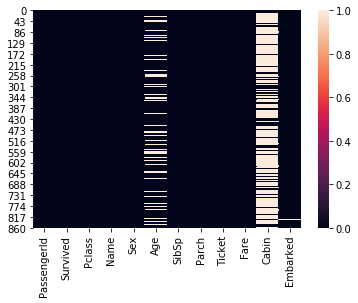

In [83]:
sns.heatmap(data.isnull())

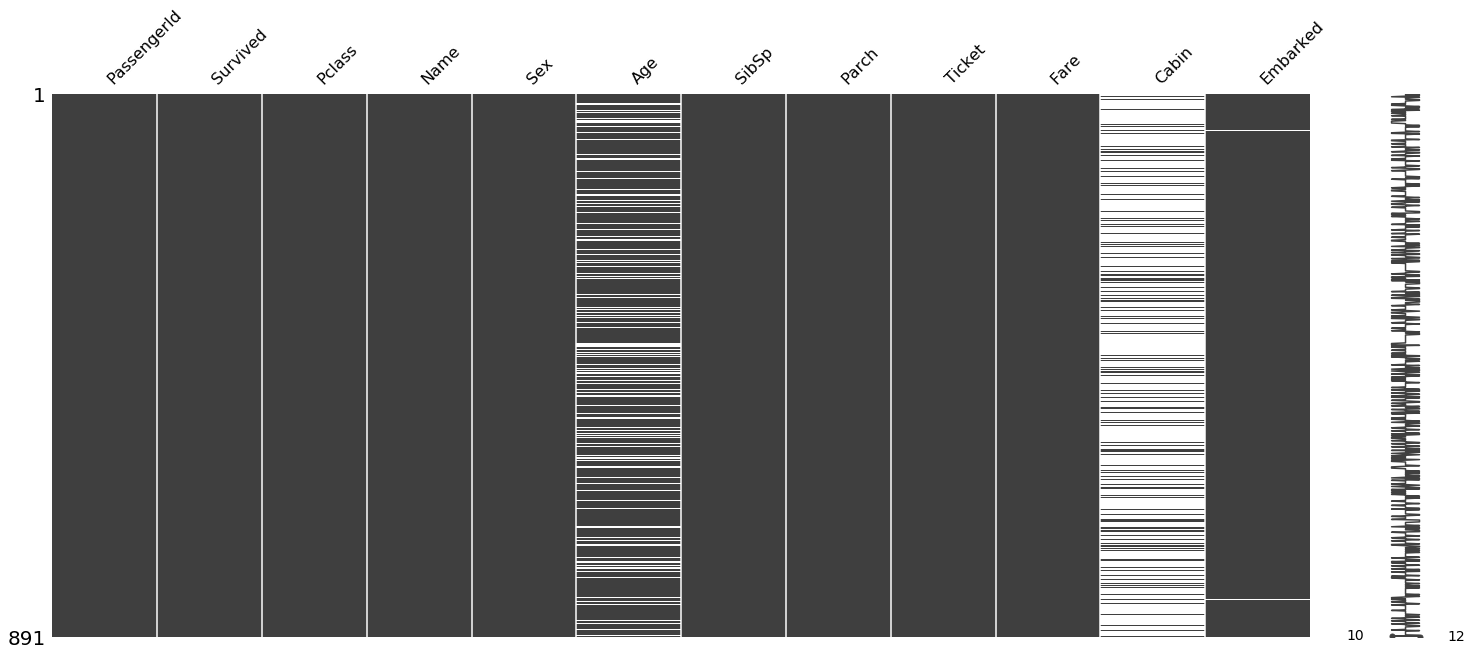

In [84]:
import missingno as ms 

ms.matrix(df)
# here we can viusalize the missing values 


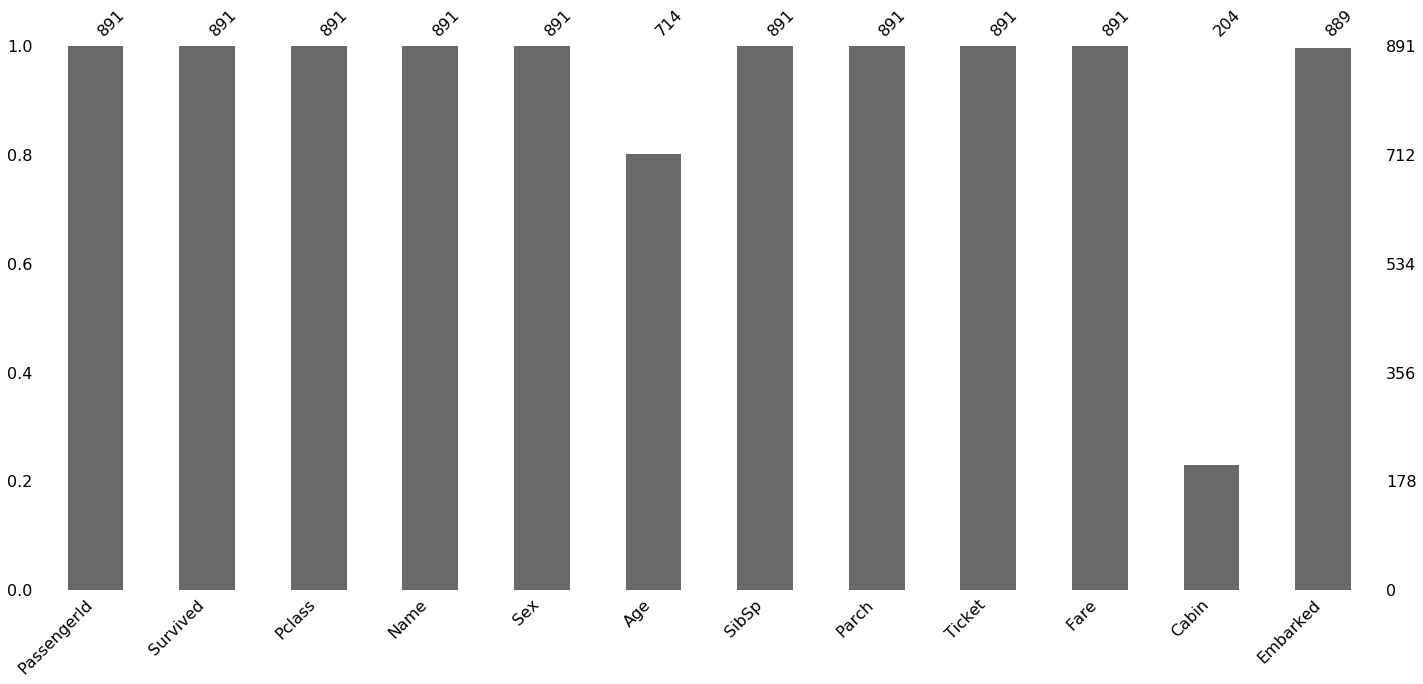

In [85]:
ms.bar(df)  # bar showing the missing values 

    Heatmaps are used to visualize correlation matrices which show the correlation of values between different columns.
    Missingno library also provides *heatmaps  that show if there is any correlation between missing values in different columns*.

<Figure size 360x360 with 0 Axes>

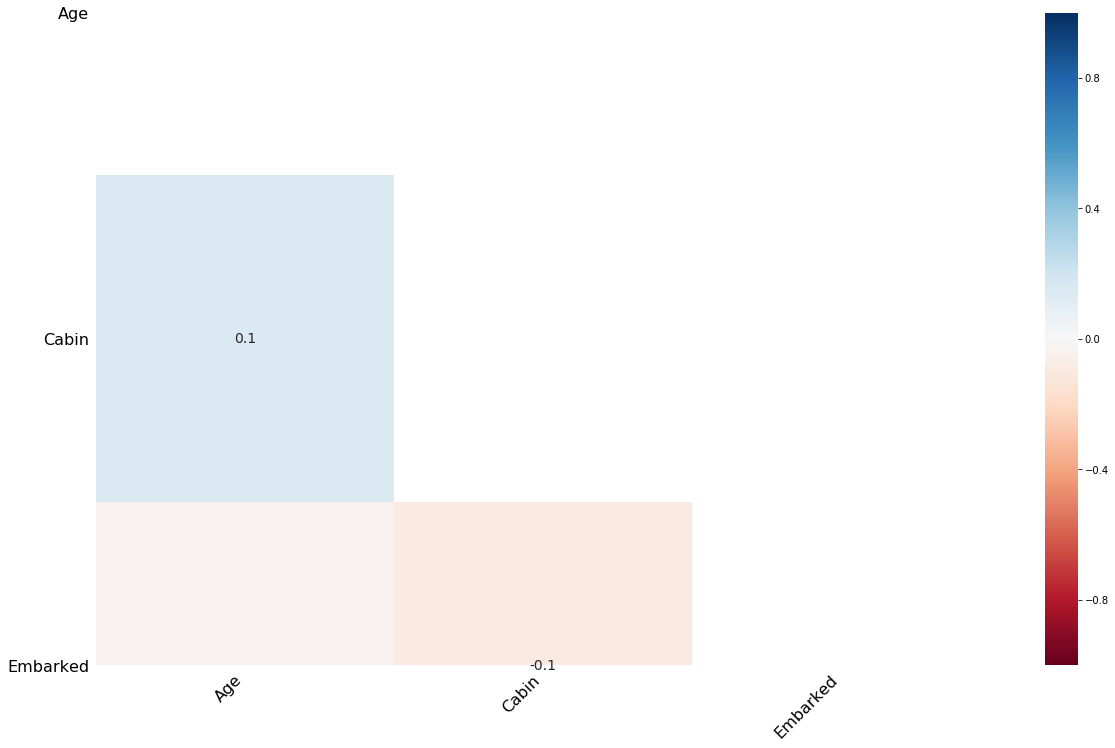

In [86]:
plt.figure(figsize=(5,5))
ms.heatmap(df)
# it shows the correlation between the missing value and the other columns


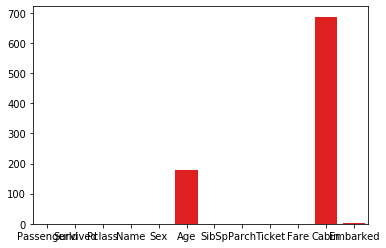

In [87]:
# another way of plotting
sns.barplot(x = df.columns , y= df.isnull().sum() , color="red") #here we can visualize the amount of missing  values / column

###### here we try to replace the missing values by the mean or median

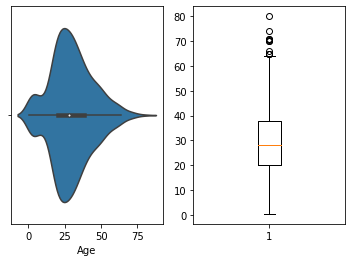

In [88]:
# checking the outliers 
plt.subplot(1,2,1)
sns.violinplot(df['Age'].dropna())
plt.subplot(1,2,2)
plt.boxplot(df ['Age'].dropna() )
plt.show()


In [90]:
# there is lots of outliers present hence we use the median here
df.Age.median()

28.0

In [95]:
def impute_nan (df , variable , median):
    df[variable +"_med"] = df[variable].fillna(median)
    return df[variable+"_med"].isna().sum()


In [97]:
impute_nan (df , "Age" , 28.0)
#here we make the seperate varibale (age_med) to use the age in further methods 

0

In [102]:
df['Age_med'].isnull().any().sum()

0

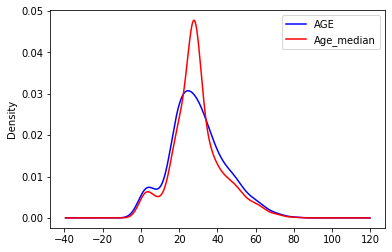

In [113]:
fig = plt.figure()
ax  = fig.add_subplot(111)
df['Age'].plot(kind ="kde" , color ="blue" ,ax=ax , label = "AGE")
df['Age_med'].plot(kind = "kde" , color = "red" ,ax=ax ,label = "Age_median")
plt.legend()

#### Advantages :- 
        1.easy to implement 
        2.faster way to getiing data ready 

#### Disadvantages :- 
        1. here , we can see that , the distrubution of the age  after impting the median has been changed , 
        2. there is change in curtosis 

# method 2 :- Capturing NAN values with new feature 
                 In this methos , we create the new feature in which the location where the Value is null(NAN) we place it as one(1) , else by 0
                 and the origional feature /column NAN values replace by the mean /median / mode 

In [114]:
df['Age'].isnull().sum()

177

In [134]:
def impute_nan1(data , variable, median): #here we try to replace NAN by the median 
    data[variable +"_NAN2"] = np.where(data[variable].isna() , 1, 0 ) # here we create the new feature
    data[variable +"_med2"] = data[variable].fillna(median)

In [135]:
impute_nan1(df , "Age" , 28.0)

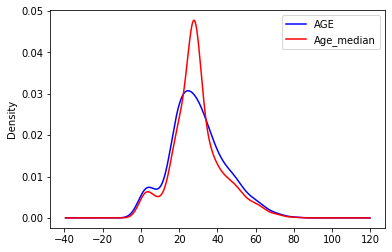

In [137]:
fig = plt.figure()
ax  = fig.add_subplot(111)
df['Age'].plot(kind ="kde" , color ="blue" ,ax=ax , label = "AGE")
df['Age_med2'].plot(kind = "kde" , color = "red" ,ax=ax ,label = "Age_median")
plt.legend()

#### Advantage  :- 
        1. Capture the importance of the missing value 
        2.Easy to implement & faster way to get data ready.


#### Disadvantages :- 
        1. it add the one more feature in data , can cause the curse of dimension.
        1. here , we can see that , the distrubution of the age  after impting the median has been changed , 
        2. there is change in curtosis 

# method 3 : - End of distrubution imputation:- 
                        In this method , we replace the NAN value by the , extreme boundary values ( mean + 3*std_deviation )
                        This method is robust to the outliers .
                        sometime , this method works well

In [143]:
mean = df['Age'].mean()

In [140]:
std_dev = df.Age.std()

In [145]:
extreme_boundary = mean + (3*std_dev)
extreme_boundary

73.27860964406095

In [146]:
# hence we replace the NAN value by the extreme boundary values
def impute_nan3 (data , variable , replace_by ):
    data[variable + "_extreme"] = data[variable].fillna(replace_by)

In [147]:
impute_nan3(df , "Age" , extreme_boundary)

In [148]:
df.Age_extreme.isna().any()

False

In [151]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_med,Age_NAN2,Age_med2,Age_extreme
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,0,38.0,38.0


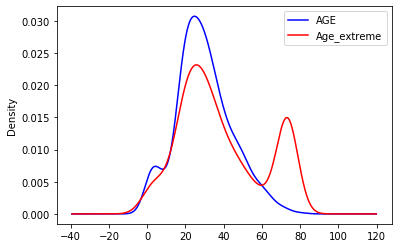

In [156]:
fig = plt.figure()
ax  = fig.add_subplot(111)
df['Age'].plot(kind ="kde" , color ="blue" ,ax=ax , label = "AGE")
df['Age_extreme'].plot(kind = "kde" , color = "red" ,ax=ax ,label = "Age_extreme")

plt.legend()

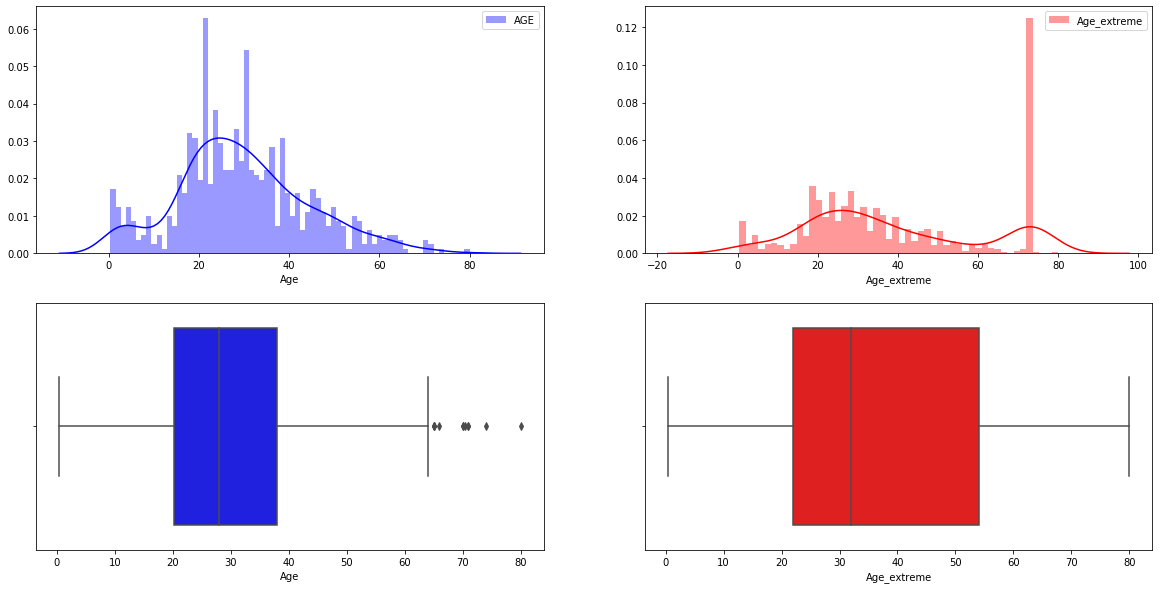

In [179]:
fig, ax = plt.subplots(figsize=(20, 10)) 
plt.subplot(2, 2, 1)
sns.distplot(df['Age'].dropna() ,bins=70 ,color="blue" ,label="AGE" ,)
plt.legend()
plt.subplot(2, 2, 2)
sns.distplot(df['Age_extreme'].dropna() ,bins=50 ,color="red" ,label="Age_extreme")
plt.legend()
plt.subplot(2, 2, 3)
sns.boxplot(df['Age'] ,color="blue")
plt.subplot(2, 2, 4)
sns.boxplot(df["Age_extreme"]  , color="red")
plt.show()



In [ ]:
# here , we can see that the in fig a ...lots of the data concentrated towards the  central portion.
# in fig a  data concentrated near  by the extreme outliers region . 
# it reduces the outliers (we can clearly see in red boxplot fig)

#### Advantages : - 
         1.It CAaptures the outliers also.
         2. easy to implement 